# **Classification | Emotion Recognition in Speech**

## **Load packages**

El dataset adquirido se descargó de Kaggle: [CREMA-D](https://www.kaggle.com/datasets/ejlok1/cremad)





In [23]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import importlib
import librosa

## **Useful functions**

In [27]:
def get_correct_path(filename):
    if len(filename) < 4 or not filename[2:4].isdigit():
        print(f"Nombre de archivo inválido: {filename}")
        return None 
    
    author_id = int(filename[2:4])
    author_folder = f"Author_{author_id}"
    correct_path = f"{base_dir}{author_folder}/{filename}"
    return correct_path

def make_csv(directory: str, output_csv="dataset.csv"):
    """
    Create a CSV file from audio dataset directories, extracting emotion and intensity information.
    
    Args:
        base_directory (str): Base directory containing the author subdirectories with audio files.
        output_csv (str): Name of the output CSV file.
    """
    data = []
    
    emotion_labels = {
        "ANG": 1, "DIS": 2, "FEA": 3, "HAP": 4, "NEU": 5, "SAD": 6
    }

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            id = filename.split(".")
            emotion_id = id[0].split("_")[2]
            data.append({
                "filename": id[0],
                "emotion_id": emotion_labels[emotion_id] ,
                })

    if data:
        df = pd.DataFrame(data)
        df.to_csv(output_csv, index=False)
        print(f"CSV creado exitosamente: {output_csv}")
    else:
        print("No se encontraron archivos de audio en las carpetas especificadas.")
 
def average_audio_duration(directory: str):
    
    dir_path = Path(directory)
    
    if not dir_path.exists() or not dir_path.is_dir():
        raise Exception(f"Directory not found: {directory}")
    
    durations = []
    
    print(f"Processing directory: {dir_path}")
    
    for file in dir_path.iterdir():
        if file.suffix == ".wav":
            try:
                y, sr = librosa.load(file, sr=None)  # Cargar el audio sin cambiar la frecuencia de muestreo
                duration = librosa.get_duration(y=y, sr=sr)  # Obtener la duración en segundos
                durations.append(duration)
            except Exception as e:
                print(f"Error processing {file.name}: {e}")
    if durations:
        avg_duration = sum(durations) / len(durations)
        print(f"{directory}: {len(durations)} archivos. Duración promedio: {avg_duration:.2f} segundos")
    else:
        print(f"{directory}: No se encontraron archivos de audio.")

In [25]:
directories = "./archive/AudioWAV"

In [26]:
average_audio_duration(directories)

Processing directory: archive\AudioWAV
./archive/AudioWAV: 7442 archivos. Duración promedio: 2.54 segundos


In [50]:
folder_name = "data"
os.makedirs(folder_name, exist_ok=True)

In [53]:
make_csv(directories, "./data/cremad_dataset.csv")

CSV creado exitosamente: ./data/cremad_dataset.csv


In [55]:
data = pd.read_csv("./data/cremad_dataset.csv")

In [56]:
data.head()

,filename,emotion_id
0,1001_DFA_ANG_XX,1
1,1001_DFA_DIS_XX,2
2,1001_DFA_FEA_XX,3
3,1001_DFA_HAP_XX,4
4,1001_DFA_NEU_XX,5


In [57]:
unique_emotions = data["emotion_id"].unique()
print(unique_emotions)

[1 2 3 4 5 6]


Se comprueba que solo existen 6 emociones diferentes en el dataset.

C:\Users\nayel\AppData\Local\Temp\ipykernel_5340\716335101.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=emotion_names, y=emotion_counts.values, palette="coolwarm")


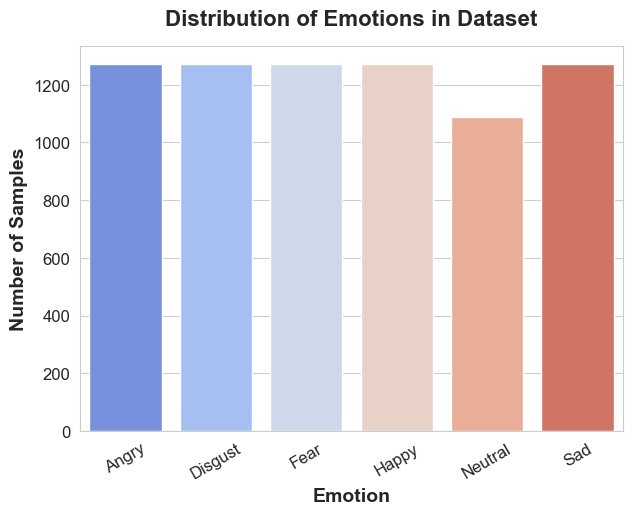

In [58]:
emotion_labels = {
    1: "Angry", 2: "Disgust", 3: "Fear", 4: "Happy", 5: "Neutral", 6: "Sad"
}

emotion_counts = data["emotion_id"].value_counts().sort_index()

emotion_names = [emotion_labels[eid] for eid in emotion_counts.index]

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

ax = sns.barplot(x=emotion_names, y=emotion_counts.values, palette="coolwarm")

plt.xlabel("Emotion", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.title("Distribution of Emotions in Dataset", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## **Análisis de espectogramas**

In [59]:
import random
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import math

In [60]:
def get_random_samples(df, k=4):
    return random.sample(df["filename"].tolist(), k) if len(df) >= k else df["filename"].tolist()

In [61]:
df_angry = data[data["emotion_id"] == 1]  # ANG
df_disgust = data[data["emotion_id"] == 2]  # DIS
df_fear = data[data["emotion_id"] == 3]  # FEA
df_happy = data[data["emotion_id"] == 4]  # HAP
df_neutral = data[data["emotion_id"] == 5]  # NEU
df_sad = data[data["emotion_id"] == 6]  # SAD

angry_random_ids = get_random_samples(df_angry)
disgust_random_ids = get_random_samples(df_disgust)
fear_random_ids = get_random_samples(df_fear)
happy_random_ids = get_random_samples(df_happy)
neutral_random_ids = get_random_samples(df_neutral)
sad_random_ids = get_random_samples(df_sad)

print("ANG:", angry_random_ids)
print("DIS:", disgust_random_ids)
print("FEA:", fear_random_ids)
print("HAP:", happy_random_ids)
print("NEU:", neutral_random_ids)
print("SAD:", sad_random_ids)

ANG: ['1062_TAI_ANG_XX', '1076_IOM_ANG_XX', '1027_IEO_ANG_HI', '1023_ITH_ANG_XX']
DIS: ['1028_IWW_DIS_XX', '1015_TIE_DIS_XX', '1066_ITH_DIS_XX', '1089_TSI_DIS_XX']
FEA: ['1001_MTI_FEA_XX', '1069_IOM_FEA_XX', '1035_TAI_FEA_XX', '1085_WSI_FEA_XX']
HAP: ['1033_TAI_HAP_XX', '1030_IWL_HAP_XX', '1060_IWL_HAP_XX', '1077_TSI_HAP_XX']
NEU: ['1070_DFA_NEU_XX', '1065_IWL_NEU_XX', '1078_ITS_NEU_XX', '1055_TIE_NEU_XX']
SAD: ['1087_IWW_SAD_XX', '1072_TIE_SAD_XX', '1091_MTI_SAD_XX', '1054_TAI_SAD_XX']


In [62]:
def generate_paths(full_path:str, ids:list[str]):
    
    paths = []
    
    for id in ids:
        paths.append(f"{full_path}{id}.wav")
    
    return paths


def plot_multiple_mel_spectrograms(audio_paths: list[str], emotion:str, n_mels=64):
    """
    Plotea múltiples gráficos de MFCC a partir de archivos de audio.
    
    Parámetros:
    - audio_paths: lista de rutas de archivos de audio.
    - n_mels: número de bandas 

    """
    full_path = "./archive/AUDIOWAV/"
    audio_paths = generate_paths(full_path, audio_paths)
    
    num_audios = len(audio_paths)
    cols = 2  
    rows = math.ceil(num_audios / cols)  
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = np.array(axes).reshape(rows, cols)

    fig.suptitle(f"Espectrogramas de Mel para analizar la emoción: {emotion}", fontsize=16, fontweight="bold")
    
    for i, audio_path in enumerate(audio_paths):
        row, col = divmod(i, cols) 
        y, sr = librosa.load(audio_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        S_db = librosa.power_to_db(S, ref=np.max)

        img = librosa.display.specshow(S_db, x_axis="time", sr=sr, cmap="viridis", ax=axes[row, col])
        axes[row, col].set_title(f"MFCC - {audio_path.split('/')[-1]}")
        fig.colorbar(img, ax=axes[row, col], format="%+2.0f dB")
    
    for i in range(num_audios, rows * cols):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

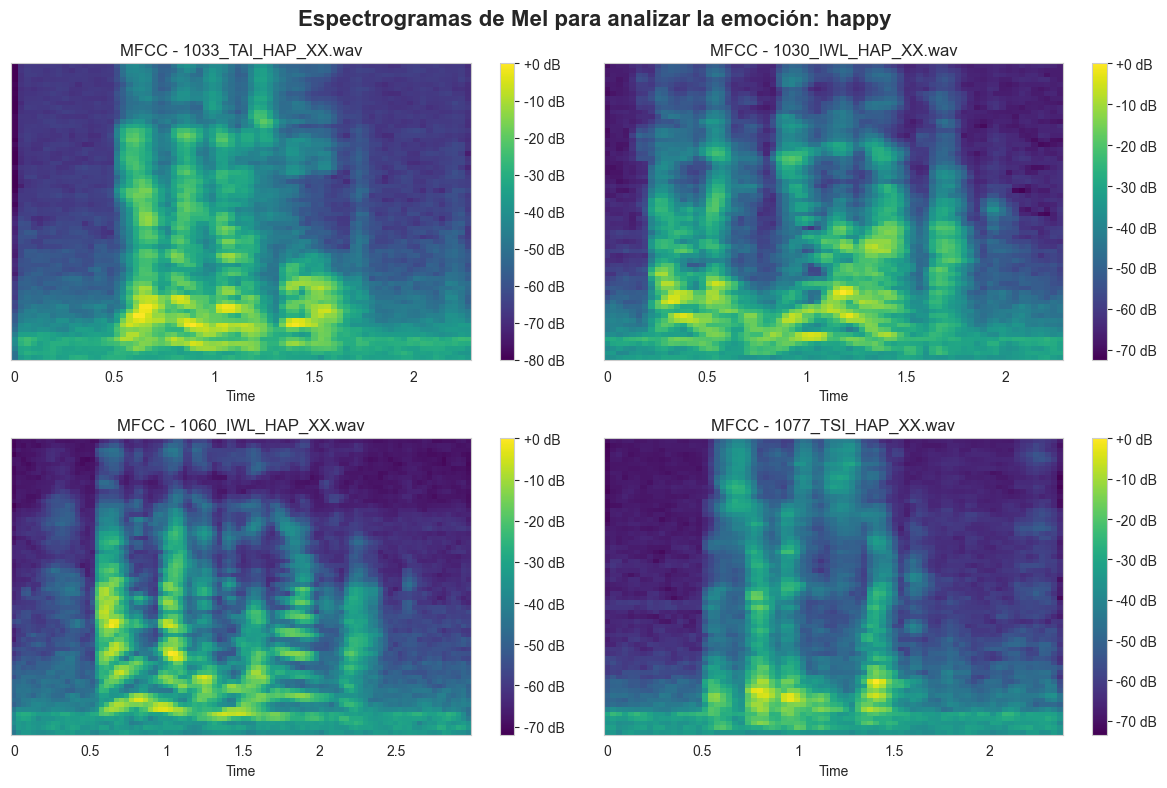

In [63]:
plot_multiple_mel_spectrograms(happy_random_ids, "happy")

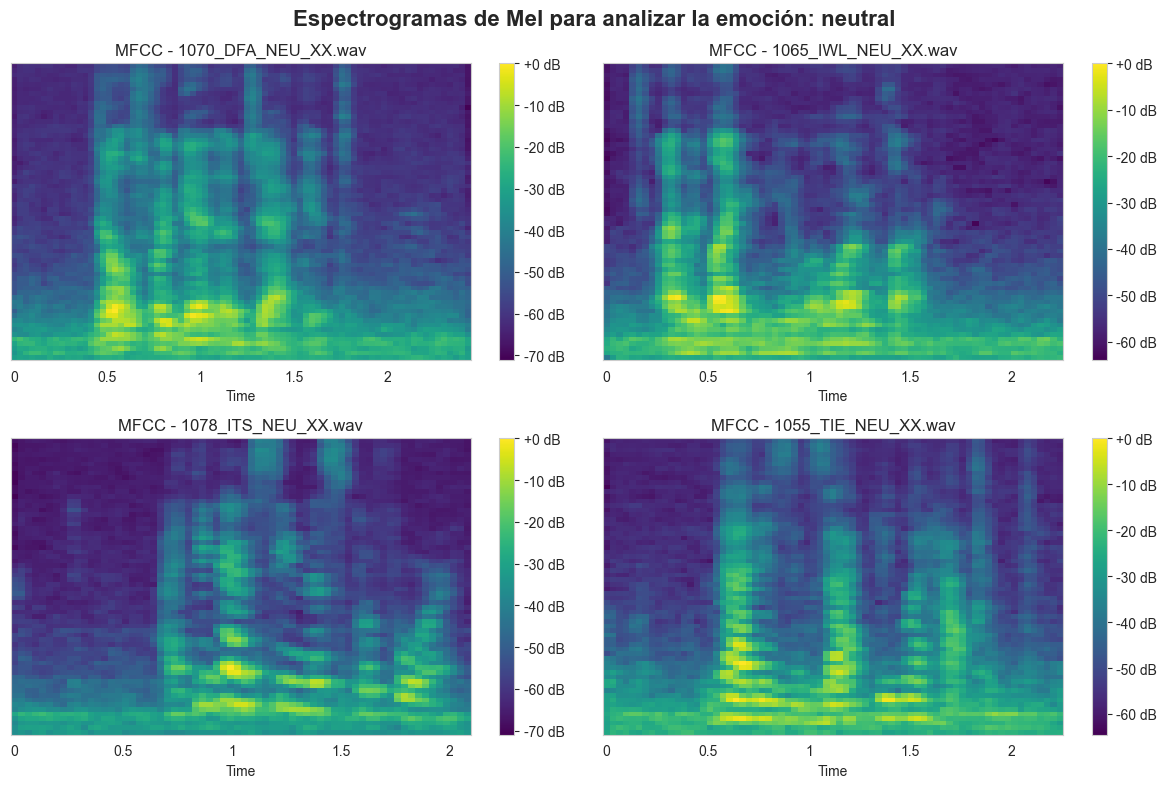

In [64]:
plot_multiple_mel_spectrograms(neutral_random_ids, "neutral")

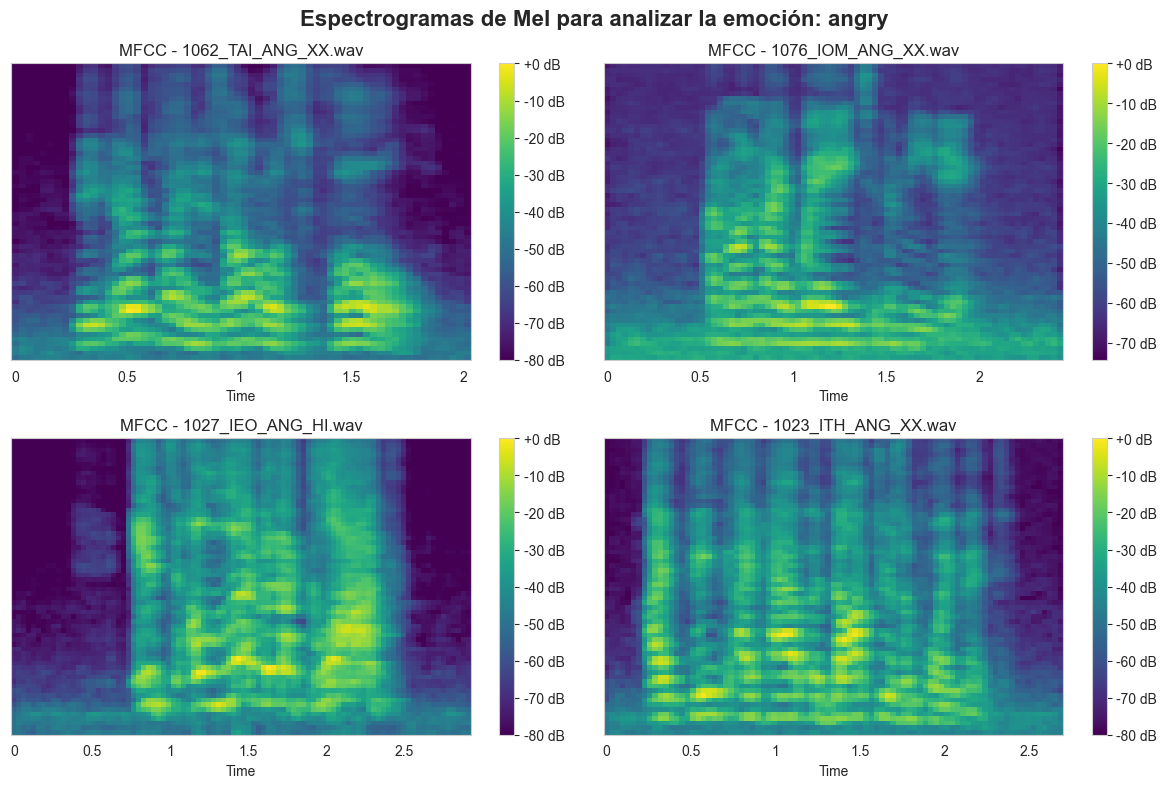

In [65]:
plot_multiple_mel_spectrograms(angry_random_ids, "angry")